<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# PART- 1 `( Data Cleaning )`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

C:\Users\hbpbn\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum columns
#pd.set_option('display.max_rows', 1000)

In [3]:
df = pd.read_json("scout_car.json", lines=True)
# Without lines=True, you will get "ValueError: Trailing data"

In [4]:
df_copy = df.copy()

In [5]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[

In [6]:
df.sample(5)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
4765,https://www.autoscout24.com//offers/audi-a3-1-...,Audi A3,1.6 TDI 116 CV Sport,Sedans,21500,VAT deductible,"17,400 km",05/2018,None,NaN,85 kW,"[, Employee's car, , Diesel]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A3, \n]",[\n2620886\n],"[\n, 2018, \n]","[\n, Black, \n]",[\nMetallic\n],[\nNero\n],"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n5\n],NaN,"[\n, Manual, \n]","[\n1,598 cc\n]",[\n4\n],"[\n1,230 kg\n]",[\nfront\n],"[\n, Diesel, \n]","[[4 l/100 km (comb)], [4.5 l/100 km (city)], [...",[\n106 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Multi-function steering whe...","[Bluetooth, Radio]","[Alloy wheels, Sport seats]","[ABS, Central door lock, Driver-side airbag, E...","[\nDEK:[2620886], Splendida vettura aziendale ...",NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
9489,https://www.autoscout24.com//offers/opel-corsa...,Opel Corsa,E Color EDI | Parkpilot | Winterpaket |,Compact,14590,VAT deductible,"37,734 km",03/2018,1 previous owner,NaN,66 kW,"[, Used, , Super 95]",\n1\n,NaN,"[\nYes\n, \n137 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]",[],\nOpel\n,"[\n, Corsa, \n]",[\n154\n],"[\n, 2018, \n]","[\n, Grey, \n]",[\nMetallic\n],[\nGraphit Grau/Graffiti Grey\n],"[\nCloth, Black\n]","[\n, Compact, \n]",[\n4\n],[\n5\n],NaN,"[\n, Automatic, \n]","[\n1,398 cc\n]",NaN,NaN,NaN,"[\n, Super 95, \n]","[[5.9 l/100 km (comb)], [7.9 l/100 km (city)],...",[\n137 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Touch screen, Voic...","[ABS, Central door lock, Daytime running light...","[\n, E10 geeignet, Standort Bühl, Interieurfar...",NaN,NaN,[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN
14646,https://www.autoscout24.com//offers/renault-cl...,Renault Clio,Life TCe 75 WLTP,Compact,10390,None,1 km,05/2019,None,NaN,56 kW,"[, Pre-registered, , Gasoline]",NaN,NaN,NaN,\n48 months\n,"[\n, \n]",NaN,[],\nRenault\n,"[\n, Clio, \n]",[\n10-900059\n],"[\n, 2019, \n]","[\n, Grey, \n]",[\nMetallic\n],[\nTITANIUM GRAU\n],NaN,"[\n, Compact, \n]",[\n5\n],[\n5\n],NaN,"[\n, Manual, \n]",[\n898 cc\n],NaN,"[\n1,126 kg\n]",NaN,"[\n, Gasoline, \n]",NaN,"[[], [], []]",NaN,"[Air conditioning, Cruise control, Power windows]","[Bluetooth, Hands-free equipment, On-board com...",NaN,"[ABS, Central door lock, Daytime running light...","[\nMobil:, Hr.Perko,0680/2359601, Hr.Jakupovic...",NaN,[\n5\n],[\nAustria\n],NaN,NaN,NaN,NaN,NaN,NaN
5764,https://www.autoscout24.com//offers/opel-astra...,Opel Astra,K Business Start/Stop 1.4 Turbo Navi PDC,Sedans,15990,VAT deductible,"18,400 km",03/2018,1 previous owner,NaN,110 kW,"[, Used, , Super 95]",\n1\n,NaN,"[\nYes\n, \n124 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",NaN,NaN,[],\nOpel\n,"[\n, Astra, \n]",[\nK325J\n],"[\n, 2018, \n]","[\n, Blue, \n]",[\nMetallic\n],[\nTiefsee Blau\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0035/BFM\n],"[\n, Automatic, \n]","[\n1,399 cc\n]",[\n4\n],"[\n1,308 kg\n]",[\nfront\n],"[\n, Super 95, \n]","[[5.5 l/100 km (comb)], [7.2 l/100 km (city)],...",[\n124 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Cruise control, El...","[Bluetooth, Digital radio, Hands-free equipmen...","[Alloy wheels, Touch screen, Voice Control]","[ABS, Central door lock, Daytime 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [8]:
# Changing column names
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [9]:
# !pip install skimpy
from skimpy import clean_columns

In [10]:
df = clean_columns(df)  # cleaning column names using skimpy clean_columns method

42 column names have been cleaned

In [11]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'k_w', 'hp', 'type',
       'previous_owners', 'next_inspection', 'inspection_new', 'warranty',
       'full_service', 'non_smoking_vehicle', 'null', 'make', 'model',
       'offer_number', 'first_registration', 'body_color', 'paint_type',
       'body_color_original', 'upholstery', 'body', 'nr_of_doors',
       'nr_of_seats', 'model_code', 'gearing_type', 'displacement',
       'cylinders', 'weight', 'drive_chain', 'fuel', 'consumption',
       'co_2_emission', 'emission_class', 'comfort_&_convenience',
       'entertainment_&_media', 'extras', 'safety_&_security', 'description',
       'emission_label', 'gears', 'country_version', 'electricity_consumption',
       'last_service_date', 'other_fuel_types', 'availability',
       'last_timing_belt_service_date', 'available_from'],
      dtype='object')

In [12]:
df.rename(columns = {'k_w':'kW',
                     'co_2_emission':'co2_emission',
                     'comfort_&_convenience': 'comfort&convenience',
                    'entertainment_&_media':'entertainment&media',
                    'safety_&_security':'safety_&_security'}, inplace = True)

In [13]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'type',
       'previous_owners', 'next_inspection', 'inspection_new', 'warranty',
       'full_service', 'non_smoking_vehicle', 'null', 'make', 'model',
       'offer_number', 'first_registration', 'body_color', 'paint_type',
       'body_color_original', 'upholstery', 'body', 'nr_of_doors',
       'nr_of_seats', 'model_code', 'gearing_type', 'displacement',
       'cylinders', 'weight', 'drive_chain', 'fuel', 'consumption',
       'co2_emission', 'emission_class', 'comfort&convenience',
       'entertainment&media', 'extras', 'safety_&_security', 'description',
       'emission_label', 'gears', 'country_version', 'electricity_consumption',
       'last_service_date', 'other_fuel_types', 'availability',
       'last_timing_belt_service_date', 'available_from'],
      dtype='object')

In [14]:
df.isnull().sum()

url                                  0
make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
kW                               15919
hp                                   0
type                                 2
previous_owners                   6640
next_inspection                  12384
inspection_new                   11987
warranty                          5420
full_service                      7704
non_smoking_vehicle               8742
null                                 0
make                                 0
model                                0
offer_number                      3175
first_registration                1597
body_color                         597
paint_type                        5772
body_color_original      

In [15]:
df.isnull().sum()/len(df)*100 # percentages of null values in each column

url                                0.000000
make_model                         0.000000
short_description                  0.288963
body_type                          0.376908
price                              0.000000
vat                               28.349771
km                                 0.000000
registration                       0.000000
prev_owner                        42.892141
kW                               100.000000
hp                                 0.000000
type                               0.012564
previous_owners                   41.711163
next_inspection                   77.793831
inspection_new                    75.299956
warranty                          34.047365
full_service                      48.395000
non_smoking_vehicle               54.915510
null                               0.000000
make                               0.000000
model                              0.000000
offer_number                      19.944720
first_registration              

In [16]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

kW                               100.000000
last_timing_belt_service_date     99.899491
electricity_consumption           99.139393
available_from                    98.291350
last_service_date                 96.444500
availability                      96.011056
other_fuel_types                  94.472015
next_inspection                   77.793831
inspection_new                    75.299956
emission_label                    74.967021
model_code                        68.729192
non_smoking_vehicle               54.915510
country_version                   52.346253
full_service                      48.395000
weight                            43.809285
drive_chain                       43.080596
prev_owner                        42.892141
previous_owners                   41.711163
paint_type                        36.258559
cylinders                         35.680633
warranty                          34.047365
gears                             29.599849
vat                             

In [17]:
def check_df(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Per_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Num_of_Nulls   : ', df[col].isnull().sum())
    print(df[col].value_counts(dropna = False))
    print("*"*30)
    print("\n\n")

In [18]:
for col in df.columns :
    check_df(col)

column name :  url
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                       

NaN                                       12384
\n04/2022\n                                  62
\n03/2021\n                                  38
\n03/2022\n                                  36
\n06/2021\n                                  34
                                          ...  
[\n12/2018\n, \n97 g CO2/km (comb)\n]         1
[\n03/2022\n, \n1 (No sticker)\n]             1
[\n05/2021\n, \n93 g CO2/km (comb)\n]         1
[\n06/2021\n, \n93 g CO2/km (comb)\n]         1
[\n01/2022\n, \n168 g CO2/km (comb)\n]        1
Name: next_inspection, Length: 1400, dtype: int64
******************************



column name :  inspection_new
--------------------------------
Per_of_Nulls   :  % 75.3
Num_of_Nulls   :  11987
NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                   

NaN                                    3759
[\nOnyx Schwarz\n]                      338
[\nBianco\n]                            282
[\nMythosschwarz Metallic\n]            238
[\nBrillantschwarz\n]                   216
                                       ... 
[\nRouge-Braun (G0Y)\n]                   1
[\nVARI COLRI DISPONIBILI\n]              1
[\nKokosnussbraun Metallic\n]             1
[\nFarbe frei wählbar\n]                  1
[\nPerlmutt-Weiß Metallic (Weiß)\n]       1
Name: body_color_original, Length: 1928, dtype: int64
******************************



column name :  upholstery
--------------------------------
Per_of_Nulls   :  % 23.37
Num_of_Nulls   :  3720
[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Othe

NaN                                                                                                                                                                                                                                                                                                                                                                                  982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                        

In [20]:
import re 

def get_diff_category_column(Series:pd.Series, exclude=''',/\n''', pattern=r'''[,\n]| /''', strip='''\n' "!?|.,*+-_/][\\n''', diff_value=list()):  
    diff_value.clear()
    column = Series.dropna().apply(str).str.strip(strip)
    for row in column:
        if not any(x in exclude for x in row) and row not in diff_value:
            diff_value.append(row)
        else:
            for data in map(lambda x: x.strip(strip), filter(None, re.split(pattern, row))):
                if data not in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

## 1. url 

In [21]:
check_df(["url"])

column name :  ['url']
--------------------------------
Per_of_Nulls   :  % url    0.0
dtype: float64
Num_of_Nulls   :  url    0
dtype: int64
url                                                                                                                                                        
https://www.autoscout24.com//offers/audi-a1-1-0-30-tfsi-sportback-advanced-2019-sh-pdc-gasoline-white-1037d13f-0851-44dd-b559-c6f6def8e6d2                     1
https://www.autoscout24.com//offers/opel-insignia-1-5-turbo-s-s-innovation-at-matrix-led-gasoline-black-8b880006-0c08-4500-91c0-2b45013716c8                   1
https://www.autoscout24.com//offers/opel-insignia-1-5-turbo-innovation-matrix-navi-pdc-gasoline-silver-bf9ce61b-6d07-4e1a-b734-e5c1742f03b8                    1
https://www.autoscout24.com//offers/opel-insignia-1-5-turbo-innovation-navi-klimaaut-gasoline-blue-900ec5a8-b2db-427d-8977-8363b8ae15b9                        1
https://www.autoscout24.com//offers/opel-insignia-1-5-turb

In [22]:
# Even if url contains some information, we do not need it since this information can be obtained from other features.
# So we will be drop later

## 2. make_model, make and model columns

In [23]:
for i in ["make_model", "make", "model"]:
    check_df(i)

column name :  make_model
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64
******************************



column name :  make
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: make, dtype: int64
******************************



column name :  model
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: model, dtype: int64
******************************





In [24]:
df[["make_model", "make", "model"]].sample(50)

,make_model,make,model
12564,Opel Insignia,\nOpel\n,"[\n, Insignia, \n]"
11890,Opel Insignia,\nOpel\n,"[\n, Insignia, \n]"
5630,Audi A3,\nAudi\n,"[\n, A3, \n]"
7815,Opel Astra,\nOpel\n,"[\n, Astra, \n]"
8504,Opel Corsa,\nOpel\n,"[\n, Corsa, \n]"
14314,Renault Clio,\nRenault\n,"[\n, Clio, \n]"
511,Audi A1,\nAudi\n,"[\n, A1, \n]"
11686,Opel Insignia,\nOpel\n,"[\n, Insignia, \n]"
751,Audi A1,\nAudi\n,"[\n, A1, \n]"
4744,Audi A3,\nAudi\n,"[\n, A3, \n]"


In [25]:
df[["make", "model"]] = df.make_model.str.split(" ", expand=True)

In [26]:
# we can drop the make_model column 
df.drop(columns="make_model", inplace=True)

## 3.short_description

In [27]:
check_df("short_description")

column name :  short_description
--------------------------------
Per_of_Nulls   :  % 0.29
Num_of_Nulls   :  46
SPB 1.6 TDI 116 CV S tronic Sport                 64
None                                              46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64
******************************





In [28]:
# Even if the columns of "short_description" & "description" contain detailed information, 
# we do NOT need it since this information can be obtained from other features.
# we will drop them later

## 4.body_type                          

In [29]:
check_df(["body_type"])

column name :  ['body_type']
--------------------------------
Per_of_Nulls   :  % body_type    0.38
dtype: float64
Num_of_Nulls   :  body_type    60
dtype: int64
body_type    
Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
dtype: int64
******************************





In [30]:
# Data is clean already we will fill the missing values

## 5.price

In [31]:
check_df("price")

column name :  price
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64
******************************





In [32]:
df.rename(columns={"price":"price_€"}, inplace=True)

In [33]:
df["price_€"] = df["price_€"].astype(float)

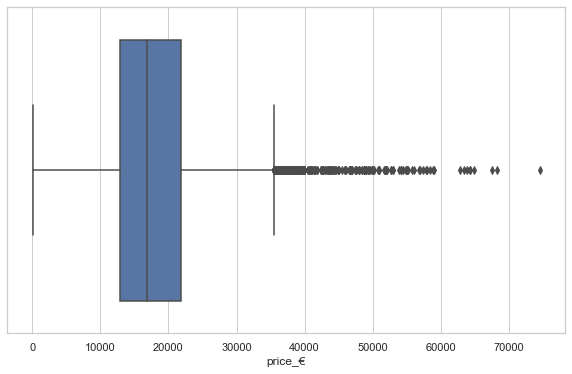

In [34]:
sns.boxplot(df["price_€"]);

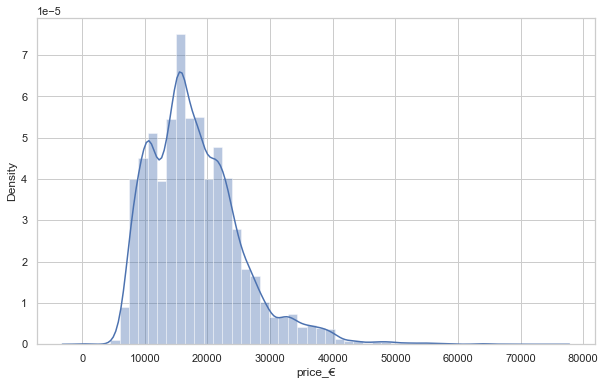

In [36]:
sns.distplot(df["price_€"]);

In [37]:
# Data is clean

## 6. vat

In [38]:
check_df("vat")

column name :  vat
--------------------------------
Per_of_Nulls   :  % 28.35
Num_of_Nulls   :  4513
VAT deductible      10980
None                 4513
Price negotiable      426
Name: vat, dtype: int64
******************************





In [39]:
# Data is clean already we will fill the missing values

## 7. km

In [40]:
check_df("km")

column name :  km
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64
******************************





In [41]:
#df['km'] = df['km'].str.replace(r'[^0-9]+', '')

df["km"] = df.km.str.replace(" km", "").str.replace(",", "")


In [42]:
df.km = df.km.replace("-", np.nan).astype(float)

## 8.registration and first_registration

In [43]:
check_df("registration")

column name :  registration
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64
******************************





In [44]:
check_df("first_registration")

column name :  first_registration
--------------------------------
Per_of_Nulls   :  % 10.03
Num_of_Nulls   :  1597
[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: first_registration, dtype: int64
******************************





In [45]:
# df.registration.str.split("/", expand=True)[1]
df["registration"] = df.registration.str.extract(r"\d+/(\d+)")

In [46]:
df.drop(columns="first_registration", inplace=True)

In [47]:
# age column will be created from this column later 

In [48]:
df.registration = df.registration.astype(float)

## 9.prev_owner                        

In [49]:
check_df("prev_owner")

column name :  prev_owner
--------------------------------
Per_of_Nulls   :  % 42.89
Num_of_Nulls   :  6828
1 previous owner     8294
None                 6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64
******************************





In [50]:
df.prev_owner = df.prev_owner.str.extract(r"(\d+)").astype(float)

In [51]:
df.prev_owner.value_counts(dropna=False)

1.0    8294
NaN    6828
2.0     778
3.0      17
4.0       2
Name: prev_owner, dtype: int64

In [ ]:
#  df.previous_owners.fillna(df.prev_owner, inplace = True)

## 10.kW

In [52]:
check_df("kW")

column name :  kW
--------------------------------
Per_of_Nulls   :  % 100.0
Num_of_Nulls   :  15919
NaN    15919
Name: kW, dtype: int64
******************************





In [53]:
df.drop(columns=["kW"], inplace=True)

In [54]:
# we dropped this column bcs all values are null

## 11.hp

In [55]:
check_df("hp")

column name :  hp
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
          ... 
84 kW        1
195 kW       1
44 kW        1
239 kW       1
9 kW         1
Name: hp, Length: 81, dtype: int64
******************************





In [56]:
df["hp"] = df.hp.str.extract(r"(\d+)").astype(float)

In [57]:
df.rename(columns={"hp":"hp_kW"}, inplace=True)

## 12.Type

In [58]:
check_df("type")

column name :  type
--------------------------------
Per_of_Nulls   :  % 0.01
Num_of_Nulls   :  2
[, Used, , Diesel (Particulate Filter)]                                                                                 3475
[, Used, , Diesel]                                                                                                      2516
[, Used, , Gasoline]                                                                                                    2367
[, Used, , Super 95]                                                                                                    1818
[, Pre-registered, , Super 95]                                                                                           500
                                                                                                                        ... 
[, New, , Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95]       1
[, Used, , Super 95 / Super

In [59]:
# Changing some columns value type from list to str
df = df.applymap(lambda x: ",".join(map(str,x)) if type(x) == list else x)
df.head()

,url,short_description,body_type,price_€,vat,km,registration,prev_owner,hp_kW,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,null,make,model,offer_number,body_color,paint_type,body_color_original,upholstery,body,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co2_emission,emission_class,comfort&convenience,entertainment&media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,last_service_date,other_fuel_types,availability,last_timing_belt_service_date,available_from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770.0,VAT deductible,56013.0,2016.0,2.0,66.0,",Used,,Diesel (Particulate Filter)",\n2\n,"\n06/2021\n,\n99 g CO2/km (comb)\n","\nYes\n,\nEuro 6\n","\n,\n,\n4 (Green)\n","\n,\n","\n,\n",,Audi,A1,\nLR-062483\n,"\n,Black,\n",\nMetallic\n,\nMythosschwarz\n,"\nCloth, Black\n","\n,Sedans,\n",\n5\n,\n5\n,\n0588/BDF\n,"\n,Automatic,\n","\n1,422 cc\n",\n3\n,"\n1,220 kg\n",\nfront\n,"\n,Diesel (Particulate Filter),\n","['3.8 l/100 km (comb)'],['4.3 l/100 km (city)'...",\n99 g CO2/km (comb)\n,\nEuro 6\n,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","\n,Sicherheit:, ,Deaktivierung für Beifahrer-A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,1.8 TFSI sport,Sedans,14500.0,Price negotiable,80000.0,2017.0,NaN,141.0,",Used,,Gasoline",NaN,NaN,NaN,NaN,NaN,NaN,,Audi,A1,NaN,"\n,Red,\n",NaN,NaN,"\nCloth, Grey\n","\n,Sedans,\n",\n3\n,\n4\n,\n0588/BCY\n,"\n,Automatic,\n","\n1,798 cc\n",\n4\n,"\n1,255 kg\n",\nfront\n,"\n,Gasoline,\n","['5.6 l/100 km (comb)'],['7.1 l/100 km (city)'...",\n129 g CO2/km (comb)\n,\nEuro 6\n,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",\nLangstreckenfahrzeug daher die hohe Kilomete...,\n4 (Green)\n,\n7\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640.0,VAT deductible,83450.0,2016.0,1.0,85.0,",Used,,Diesel (Particulate Filter)",\n1\n,NaN,NaN,"\n,\n,\n99 g CO2/km (comb)\n",NaN,NaN,,Audi,A1,\nAM-95365\n,"\n,Black,\n",\nMetallic\n,\nmythosschwarz metallic\n,"\nCloth, Black\n","\n,Sedans,\n",\n4\n,\n4\n,NaN,"\n,Automatic,\n","\n1,598 cc\n",NaN,NaN,\nfront\n,"\n,Diesel (Particulate Filter),\n","['3.8 l/100 km (comb)'],['4.4 l/100 km (city)'...",\n99 g CO2/km (comb)\n,\nEuro 6\n,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","\n,Fahrzeug-Nummer: AM-95365, ,Ehem. UPE 24.64...",\n4 (Green)\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,1.4 TDi Design S tronic,Sedans,14500.0,None,73000.0,2016.0,1.0,66.0,",Used,,Diesel (Particulate Filter)",\n1\n,NaN,NaN,NaN,"\n,\n,\n99 g CO2/km (comb)\n","\n,\n,\nEuro 6\n",,Audi,A1,NaN,"\n,Brown,\n",\nMetallic\n,NaN,NaN,"\n,Sedans,\n",\n3\n,\n4\n,NaN,"\n,Automatic,\n","\n1,422 cc\n",\n3\n,"\n1,195 kg\n",NaN,"\n,Diesel (Particulate Filter),\n","['3.8 l/100 km (comb)'],['4.3 l/100 km (city)'...",\n99 g CO2/km (comb)\n,\nEuro 6\n,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","\nAudi A1: ,- 1e eigenaar ,- Perfecte staat: s...",NaN,\n6\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.autoscout24.com//offers/audi-a1-sp...,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790.0,None,16200.0,2016.0,1.0,66.0,",Used,,Diesel (Particulate Filt

In [60]:
df["type"] = df.type.str.extract(r",(\w+|\w+\W\w+|\w+\W\w\s\w+),")

In [61]:
df.type.sample(50)

3337     Employee's car
9890      Demonstration
802                Used
525                Used
9891      Demonstration
12783     Demonstration
10968              Used
13940              Used
1466               Used
4482     Employee's car
1006               Used
5669     Pre-registered
3949               Used
12084    Employee's car
13436              Used
3868     Employee's car
14326              Used
9996     Pre-registered
9538     Pre-registered
12200              Used
7025               Used
11552    Employee's car
1814               Used
15775    Pre-registered
3523               Used
14304              Used
9616               Used
3070               Used
9827     Employee's car
15087              Used
10857              Used
15889     Demonstration
6800               Used
7866               Used
14458              Used
10107              Used
5801               Used
7456               Used
6172               Used
13188    Employee's car
4915               Used
7058            

In [62]:
df.type.value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

In [63]:
df.type.unique()

array(['Used', "Employee's car", 'New', 'Demonstration', 'Pre-registered',
       nan], dtype=object)

## 13.previous_owners

In [64]:
check_df("previous_owners")

column name :  previous_owners
--------------------------------
Per_of_Nulls   :  % 41.71
Num_of_Nulls   :  6640
\n1\n                                                                               8103
NaN                                                                                 6640
\n2\n                                                                                766
\n0\n                                                                                163
\n3\n                                                                                 17
                                                                                    ... 
\n1\n,\n111 g CO2/km (comb)\n                                                          1
\n1\n,\nEuro 6\n                                                                       1
\n2\n,\n119 g CO2/km (comb)\n                                                          1
\n1\n,\n,6.6 l/100 km (comb),\n,8.1 l/100 km (city),\n,5.7 l/100 km (country),\n      

In [65]:
df[["prev_owner", "previous_owners"]]

,prev_owner,previous_owners
0,2.0,\n2\n
1,NaN,NaN
2,1.0,\n1\n
3,1.0,\n1\n
4,1.0,\n1\n
...,...,...
15914,NaN,NaN
15915,1.0,"\n1\n,\n,7.4 l/100 km (comb),\n,9.2 l/100 km (..."
15916,1.0,"\n1\n,\n139 g CO2/km (comb)\n"
15917,NaN,NaN


In [66]:
check_df("prev_owner")

column name :  prev_owner
--------------------------------
Per_of_Nulls   :  % 42.89
Num_of_Nulls   :  6828
1.0    8294
NaN    6828
2.0     778
3.0      17
4.0       2
Name: prev_owner, dtype: int64
******************************





In [67]:
df.previous_owners = df.previous_owners.str.split(",",expand=True)[0].str.extract(r"(\d+)")

In [69]:
df.previous_owners.value_counts(dropna=False)

1      8294
NaN    6640
2       778
0       188
3        17
4         2
Name: previous_owners, dtype: int64

In [70]:
df.previous_owners = df.previous_owners.astype(float)

In [71]:
# we will control prev_owner and previous_owners, we will try to fill with each other and drop one of them. 

## 14.next_inspection

In [72]:
check_df("next_inspection")

column name :  next_inspection
--------------------------------
Per_of_Nulls   :  % 77.79
Num_of_Nulls   :  12384
NaN                                    12384
\n04/2022\n                               62
\n06/2021\n                               47
\n03/2021\n                               39
\n03/2022\n                               36
                                       ...  
\n06/2021\n,\n121 g CO2/km (comb)\n        1
\n02/2020\n,\n139 g CO2/km (comb)\n        1
\n10/2021\n,\n136 g CO2/km (comb)\n        1
\n06/2019\n,\n139 g CO2/km (comb)\n        1
\n01/2022\n,\n168 g CO2/km (comb)\n        1
Name: next_inspection, Length: 1385, dtype: int64
******************************





In [73]:
# There are many null values and also it is not relevant to analysis bcs of that we can drop this column without cleaning

In [74]:
df.drop(columns="next_inspection", inplace=True)

## 15. inspection_new

In [75]:
check_df("inspection_new")

column name :  inspection_new
--------------------------------
Per_of_Nulls   :  % 75.3
Num_of_Nulls   :  11987
NaN                                                                                   11987
\nYes\n,\nEuro 6\n                                                                      523
\nYes\n                                                                                 442
\nYes\n,\n102 g CO2/km (comb)\n                                                         174
\nYes\n,\n4 (Green)\n                                                                   166
                                                                                      ...  
\nYes\n,\n,5.2 l/100 km (comb),\n,6.7 l/100 km (city),\n,4.2 l/100 km (country),\n        1
\nYes\n,\n100 g CO2/km (comb)\n                                                           1
\nYes\n,\n,4.9 l/100 km (comb),\n,5.9 l/100 km (city),\n,4.3 l/100 km (country),\n        1
\nYes\n,\n,5.1 l/100 km (comb),\n,6.4 l/100 km (city),\n,4.3

In [76]:
# There are many null values and also it is not relevant to analysis bcs of that we can drop this column without cleaning

In [77]:
df.drop(columns="inspection_new", inplace=True)

## 16.warranty

In [78]:
check_df("warranty")

column name :  warranty
--------------------------------
Per_of_Nulls   :  % 34.05
Num_of_Nulls   :  5420
NaN                                                                                       5420
\n,\n,\nEuro 6\n                                                                          1868
\n12 months\n                                                                             1305
\n                                                                                         979
\n24 months\n                                                                              585
                                                                                          ... 
\n2 months\n                                                                                 1
\n72 months\n,\n125 g CO2/km (comb)\n                                                        1
\n60 months\n,\n14 g CO2/km (comb)\n                                                         1
\n24 months\n,\n121 g CO2/km (comb)\n  

In [79]:
df.warranty = df.warranty.str.extract(r"(\d+) months")

In [80]:
df.warranty = df.warranty.astype(float)

In [81]:
df.warranty.sort_values(ascending=False)

7612     72.0
7959     72.0
7898     72.0
7897     72.0
12614    72.0
         ... 
15913     NaN
15915     NaN
15916     NaN
15917     NaN
15918     NaN
Name: warranty, Length: 15919, dtype: float64

In [82]:
df.warranty.value_counts()

12.0    2594
24.0    1118
60.0     401
36.0     279
48.0     149
6.0      125
72.0      59
3.0       33
23.0      11
18.0      10
20.0       7
25.0       6
2.0        5
50.0       4
26.0       4
16.0       4
4.0        3
1.0        3
19.0       3
34.0       3
13.0       3
28.0       2
22.0       2
14.0       2
11.0       2
46.0       2
21.0       2
9.0        2
17.0       2
45.0       2
33.0       1
40.0       1
65.0       1
10.0       1
15.0       1
7.0        1
8.0        1
56.0       1
49.0       1
47.0       1
30.0       1
Name: warranty, dtype: int64

## 17.full_service

In [83]:
check_df("full_service")

column name :  full_service
--------------------------------
Per_of_Nulls   :  % 48.39
Num_of_Nulls   :  7704
NaN                                                                                 7704
\n,\n,\n4 (Green)\n                                                                 2235
\n,\n,\nEuro 6\n                                                                    2097
\n,\n                                                                               1702
\n,\n,\nEuro 6d-TEMP\n                                                               399
                                                                                    ... 
\n,\n,\n80 g CO2/km (comb)\n                                                           1
\n,\n,\n84 g CO2/km (comb)\n                                                           1
\n,\n,\n,6 l/100 km (comb),\n,8 l/100 km (city),\n,4.9 l/100 km (country),\n           1
\n,\n,\n,4.9 l/100 km (comb),\n,6.2 l/100 km (city),\n,4.1 l/100 km (country),\n       1


In [84]:
df.drop(columns="full_service", inplace=True)

## 18.non_smoking_vehicle

In [85]:
check_df("non_smoking_vehicle")

column name :  non_smoking_vehicle
--------------------------------
Per_of_Nulls   :  % 54.92
Num_of_Nulls   :  8742
NaN                                                                                 8742
\n,\n                                                                               3647
\n,\n,\n4 (Green)\n                                                                 1240
\n,\n,\nEuro 6\n                                                                    1127
\n,\n,\nEuro 6d-TEMP\n                                                               345
                                                                                    ... 
\n,\n,\n,5.6 l/100 km (comb),\n,7.3 l/100 km (city),\n,4.7 l/100 km (country),\n       1
\n,\n,\n122 g CO2/km (comb)\n                                                          1
\n,\n,\n158 g CO2/km (comb)\n                                                          1
\n,\n,\n150 g CO2/km (comb)\n                                                     

In [86]:
df.drop(columns="non_smoking_vehicle", inplace=True)

## 19. null

In [87]:
check_df("null")

column name :  null
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
    15919
Name: null, dtype: int64
******************************





In [88]:
df.drop(columns="null", inplace=True)

## 20. offer_number

In [89]:
check_df("offer_number")

column name :  offer_number
--------------------------------
Per_of_Nulls   :  % 19.94
Num_of_Nulls   :  3175
NaN                                             3175
\nLT67679\n                                       27
\nUN89904\n                                       27
\nXJ38068\n                                       27
\nJV03654\n                                       27
                                                ... 
\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n       1
\n6701576\n                                        1
\n6701569\n                                        1
\n158121\n                                         1
\nRe_30000008029\n                                 1
Name: offer_number, Length: 11441, dtype: int64
******************************





In [90]:
df.drop(columns="offer_number", inplace=True)

## 21. body_color

In [91]:
check_df("body_color")

column name :  body_color
--------------------------------
Per_of_Nulls   :  % 3.75
Num_of_Nulls   :  597
\n,Black,\n     3745
\n,Grey,\n      3505
\n,White,\n     3406
\n,Silver,\n    1647
\n,Blue,\n      1431
\n,Red,\n        957
NaN              597
\n,Brown,\n      289
\n,Green,\n      154
\n,Beige,\n      108
\n,Yellow,\n      51
\n,Violet,\n      18
\n,Bronze,\n       6
\n,Orange,\n       3
\n,Gold,\n         2
Name: body_color, dtype: int64
******************************





In [92]:
df.body_color = df.body_color.str.split(",", expand=True)[1]

In [93]:
df.body_color.value_counts(dropna=False).head(15)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

## 22. paint_type

In [95]:
check_df("paint_type")

column name :  paint_type
--------------------------------
Per_of_Nulls   :  % 36.26
Num_of_Nulls   :  5772
\nMetallic\n       9794
NaN                5772
\nUni/basic\n       347
\nPerl effect\n       6
Name: paint_type, dtype: int64
******************************





In [96]:
df.paint_type.head(25)

0      \nMetallic\n
1               NaN
2      \nMetallic\n
3      \nMetallic\n
4      \nMetallic\n
5      \nMetallic\n
6      \nMetallic\n
7      \nMetallic\n
8      \nMetallic\n
9               NaN
10     \nMetallic\n
11    \nUni/basic\n
12     \nMetallic\n
13              NaN
14     \nMetallic\n
15     \nMetallic\n
16              NaN
17              NaN
18              NaN
19     \nMetallic\n
20              NaN
21     \nMetallic\n
22     \nMetallic\n
23     \nMetallic\n
24              NaN
Name: paint_type, dtype: object

In [97]:
df.paint_type.str.extract(r"(\w+\W\w+|\w+)").value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
dtype: int64

In [98]:
df.paint_type = df.paint_type.str.extract(r"(\w+\W\w+|\w+)")

In [99]:
df.paint_type.value_counts()

Metallic       9794
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

## 23.body_color_original

In [100]:
check_df("body_color_original")

column name :  body_color_original
--------------------------------
Per_of_Nulls   :  % 23.61
Num_of_Nulls   :  3759
NaN                                  3759
\nOnyx Schwarz\n                      338
\nBianco\n                            282
\nMythosschwarz Metallic\n            238
\nBrillantschwarz\n                   216
                                     ... 
\nRouge-Braun (G0Y)\n                   1
\nVARI COLRI DISPONIBILI\n              1
\nKokosnussbraun Metallic\n             1
\nFarbe frei wählbar\n                  1
\nPerlmutt-Weiß Metallic (Weiß)\n       1
Name: body_color_original, Length: 1928, dtype: int64
******************************





In [101]:
df.body_color_original = df.body_color_original.str.split("\n", expand=True)[1]

## 24. upholstery

In [102]:
check_df("upholstery")

column name :  upholstery
--------------------------------
Per_of_Nulls   :  % 23.37
Num_of_Nulls   :  3720
\nCloth, Black\n           5821
NaN                        3720
\nPart leather, Black\n    1121
\nCloth\n                  1005
\nCloth, Grey\n             891
\nCloth, Other\n            639
\nFull leather, Black\n     575
\nBlack\n                   491
\nGrey\n                    273
\nOther, Other\n            182
\nPart leather\n            140
\nFull leather\n            139
\nFull leather, Brown\n     116
\nPart leather, Grey\n      116
\nOther, Black\n            110
\nFull leather, Other\n      72
\nFull leather, Grey\n       67
\nPart leather, Other\n      65
\nOther\n                    56
\nPart leather, Brown\n      50
\nalcantara, Black\n         47
\nVelour, Black\n            36
\nFull leather, Beige\n      36
\nCloth, Brown\n             28
\nVelour\n                   16
\nOther, Grey\n              15
\nCloth, Beige\n             13
\nBrown\n                   

In [103]:
# df.upholstery.str.split("\n", expand=True)[1].str.extract(r"(\w+\s?\w+)").value_counts()

df.upholstery.str.split("\n", expand=True)[1].str.split(",", expand=True)[0].value_counts()

Cloth           8423
Part leather    1499
Full leather    1009
Black            491
Other            368
Grey             273
Velour            60
alcantara         57
Brown             12
Beige              3
Blue               2
White              2
Name: 0, dtype: int64

In [104]:
df.upholstery = df.upholstery.str.split("\n", expand=True)[1].str.split(",", expand=True)[0]

In [105]:
# we assumed that if there is only color info in column, it's cloth's color
Cloths = ['Cloth','Black', 'Grey', 'Blue', 'White', 'Beige', 'Brown']

In [106]:
def upholsterytype(x):
    if x in Cloths:
        return "Cloth"
    elif x == "Full leather":
        return "Full leather"
    elif x == "Part leather":
        return "Part leather"
    elif x == "alcantara":
        return "alcantara"
    elif x== "Velour":
        return "Velour"
    elif x== "Other":
        return "Other"


In [107]:
df["upholstery"] = df["upholstery"].apply(upholsterytype)

In [108]:
df.upholstery.value_counts()

Cloth           9206
Part leather    1499
Full leather    1009
Other            368
Velour            60
alcantara         57
Name: upholstery, dtype: int64

## 25.body       

In [109]:
check_df("body")

column name :  body
--------------------------------
Per_of_Nulls   :  % 0.38
Num_of_Nulls   :  60
\n,Sedans,\n           7903
\n,Station wagon,\n    3553
\n,Compact,\n          3153
\n,Van,\n               783
\n,Other,\n             290
\n,Transporter,\n        88
NaN                      60
\n,Off-Road,\n           56
\n,Coupe,\n              25
\n,Convertible,\n         8
Name: body, dtype: int64
******************************





In [110]:
df.body.str.strip("\n,").value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body, dtype: int64

In [111]:
check_df("body_type")

column name :  body_type
--------------------------------
Per_of_Nulls   :  % 0.38
Num_of_Nulls   :  60
Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
None               60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64
******************************





In [112]:
# as we can see body and body_type columns are the same, so we will drop body column
df.drop(columns="body", inplace=True)

## 26.nr_of_doors

In [113]:
check_df("nr_of_doors")

column name :  nr_of_doors
--------------------------------
Per_of_Nulls   :  % 1.33
Num_of_Nulls   :  212
\n5\n    11575
\n4\n     3079
\n3\n      832
\n2\n      219
NaN        212
\n1\n        1
\n7\n        1
Name: nr_of_doors, dtype: int64
******************************





In [114]:
df.nr_of_doors.str.strip("\n").value_counts()

5    11575
4     3079
3      832
2      219
1        1
7        1
Name: nr_of_doors, dtype: int64

In [115]:
df.nr_of_doors = df.nr_of_doors.str.strip("\n")

In [116]:
df.nr_of_doors = df.nr_of_doors.astype(float)

## 27.nr_of_seats

In [117]:
check_df("nr_of_seats")

column name :  nr_of_seats
--------------------------------
Per_of_Nulls   :  % 6.14
Num_of_Nulls   :  977
\n5\n    13336
\n4\n     1125
NaN        977
\n7\n      362
\n2\n      116
\n6\n        2
\n3\n        1
Name: nr_of_seats, dtype: int64
******************************





In [118]:
df.nr_of_seats.str.strip("\n").value_counts()

5    13336
4     1125
7      362
2      116
6        2
3        1
Name: nr_of_seats, dtype: int64

In [119]:
df.nr_of_seats = df.nr_of_seats.str.strip("\n")

In [120]:
df.nr_of_seats = df.nr_of_seats.astype(float)

## 28.model_code

In [121]:
check_df("model_code")

column name :  model_code
--------------------------------
Per_of_Nulls   :  % 68.73
Num_of_Nulls   :  10941
NaN             10941
\n0035/BCB\n      268
\n0588/BNO\n      245
\n0588/BDB\n      206
\n0588/BHX\n      188
                ...  
\n0035/AVN\n        1
\n0035/BEM\n        1
\n0035/BAG\n        1
\n0035/BAA\n        1
\n3333/BKG\n        1
Name: model_code, Length: 233, dtype: int64
******************************





In [122]:
# There is relevant to analysis and also there are lots of null values bcs of that we will drop this column.
df.drop(columns="model_code", inplace=True)

## 29. gearing_type                   

In [123]:
check_df("gearing_type")

column name :  gearing_type
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
\n,Manual,\n            8153
\n,Automatic,\n         7297
\n,Semi-automatic,\n     469
Name: gearing_type, dtype: int64
******************************





In [124]:
df.gearing_type = df.gearing_type.str.strip("\n,")

## 30. displacement

In [125]:
check_df("displacement")

column name :  displacement
--------------------------------
Per_of_Nulls   :  % 3.12
Num_of_Nulls   :  496
\n1,598 cc\n    4761
\n999 cc\n      2438
\n1,398 cc\n    1314
\n1,399 cc\n     749
\n1,229 cc\n     677
                ... 
\n122 cc\n         1
\n1,198 cc\n       1
\n1,195 cc\n       1
\n2,967 cc\n       1
\n1,800 cc\n       1
Name: displacement, Length: 78, dtype: int64
******************************





In [126]:
df.displacement.str.strip("\n cc").str.replace(",", "").astype(float).value_counts().sort_index(ascending=False).head(10)

16000.0      1
15898.0      1
2967.0       1
2480.0      20
2000.0      46
1998.0      25
1997.0     103
1995.0       1
1984.0      18
1968.0     301
Name: displacement, dtype: int64

In [127]:
df.displacement.str.strip("\n cc").str.replace(",", "").astype(float).value_counts().sort_index(ascending=False).tail(10)

899.0     11
898.0    351
890.0      1
160.0      6
140.0      1
139.0      4
122.0      1
54.0       1
2.0        2
1.0       36
Name: displacement, dtype: int64

In [128]:
df.displacement = df.displacement.str.strip("\n cc").str.replace(",", "").astype(float)

In [129]:
df.rename(columns={"displacement":"engine_displacement_cc"}, inplace=True)

## 31. cylinders

In [130]:
check_df("cylinders")

column name :  cylinders
--------------------------------
Per_of_Nulls   :  % 35.68
Num_of_Nulls   :  5680
\n4\n    8105
NaN      5680
\n3\n    2104
\n5\n      22
\n6\n       3
\n8\n       2
\n2\n       2
\n1\n       1
Name: cylinders, dtype: int64
******************************





In [131]:
df.cylinders.str.strip("\n").value_counts(dropna=False)

4      8105
NaN    5680
3      2104
5        22
6         3
8         2
2         2
1         1
Name: cylinders, dtype: int64

In [132]:
df.cylinders = df.cylinders.str.strip("\n").astype(float)

## 32.weight                         

In [133]:
check_df("weight")

column name :  weight
--------------------------------
Per_of_Nulls   :  % 43.81
Num_of_Nulls   :  6974
NaN             6974
\n1,163 kg\n     574
\n1,360 kg\n     356
\n1,165 kg\n     301
\n1,335 kg\n     242
                ... 
\n1,960 kg\n       1
\n1,258 kg\n       1
\n1,167 kg\n       1
\n1,331 kg\n       1
\n2,037 kg\n       1
Name: weight, Length: 435, dtype: int64
******************************





In [134]:
df.weight = df.weight.str.strip("\n kg").str.replace(",", "")

In [135]:
df.rename(columns={"weight":"weight_kg"}, inplace=True)

In [136]:
df.weight_kg = df.weight_kg.astype(float)

## 33.drive_chain

In [137]:
check_df("drive_chain")

column name :  drive_chain
--------------------------------
Per_of_Nulls   :  % 43.08
Num_of_Nulls   :  6858
\nfront\n    8886
NaN          6858
\n4WD\n       171
\nrear\n        4
Name: drive_chain, dtype: int64
******************************





In [138]:
df.drive_chain.str.strip("\n").value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [139]:
df.drive_chain = df.drive_chain.str.strip("\n")

## 34. fuel

In [140]:
check_df("fuel")

column name :  fuel
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
\n,Diesel (Particulate Filter),\n                                                                                  4315
\n,Super 95,\n                                                                                                     3338
\n,Gasoline,\n                                                                                                     3175
\n,Diesel,\n                                                                                                       2984
\n,Super 95 / Regular/Benzine 91,\n                                                                                 424
                                                                                                                   ... 
\n,Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91,\n                                                          1
\n,Super Plus 98 / Super E10 95,\n                             

In [141]:
df.fuel = df.fuel.str.strip("\n,")

In [142]:
# df.fuel.str.extract(r"(\w+\s?\w+\s?\w+\s?\w+|\w+)").value_counts(dropna=False)

df.fuel.str.extract(r"(\w+\s?\w+\s?\w+)").value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10             2
Biogas                     1
Domestic gas H             1
dtype: int64

In [143]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10", "Others"]
lpg = ["LPG", "Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]

In [144]:
def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return "LPG/CNG"
    else :
        return x

In [145]:
df.fuel = df.fuel.apply(fueltype)

## 35.consumption

In [146]:
check_df("consumption")

column name :  consumption
--------------------------------
Per_of_Nulls   :  % 11.97
Num_of_Nulls   :  1906
NaN                                                                           1906
['3.9 l/100 km (comb)'],['4.1 l/100 km (city)'],['3.7 l/100 km (country)']     304
['4.2 l/100 km (comb)'],['5 l/100 km (city)'],['3.7 l/100 km (country)']       276
['5.4 l/100 km (comb)'],['6.8 l/100 km (city)'],['4.5 l/100 km (country)']     257
['3.8 l/100 km (comb)'],['4.3 l/100 km (city)'],['3.5 l/100 km (country)']     253
                                                                              ... 
['4.2 l/100 km (comb)'],['5.3 l/100 km (city)'],['3.6 l/100 km (country)']       1
\n,5.1 l/100 km (comb),\n,6.4 l/100 km (city),\n,4.3 l/100 km (country),\n       1
['4.6 l/100 km (comb)'],['5.4 l/100 km (city)'],['6.7 l/100 km (country)']       1
\n,6.3 l/100 km (comb),\n,\n,\n                                                  1
\n,7.4 l/100 km (comb),\n,9.6 l/100 km (city),\n,6 l/100 km (

In [147]:
pd.options.display.max_colwidth = 250

In [148]:
df["consumption_comb"] = df.consumption.str.extract(r"(\d+\.\d+) l/100 km \(comb\)").astype(float)

In [149]:
df["consumption_city"] = df.consumption.str.extract(r"(\d+\.\d+) l/100 km \(city\)").astype(float)

In [150]:
df["consumption_country"] = df.consumption.str.extract(r"(\d+\.\d+) l/100 km \(country\)").astype(float)

In [151]:
df.drop(columns="consumption", inplace=True)

## 36.co2_emission

In [152]:
check_df("co2_emission")

column name :  co2_emission
--------------------------------
Per_of_Nulls   :  % 11.36
Num_of_Nulls   :  1808
NaN                          1808
\n120 g CO2/km (comb)\n       740
[],[],[]                      628
\n99 g CO2/km (comb)\n        545
\n97 g CO2/km (comb)\n        537
                             ... 
\n14 g CO2/km (comb)\n          1
\n1,060 g CO2/km (comb)\n       1
\n51 g CO2/km (comb)\n          1
\n165 g CO2/km (comb)\n         1
\n193 g CO2/km (comb)\n         1
Name: co2_emission, Length: 124, dtype: int64
******************************





In [153]:
# df.co2_emission.str.strip("[],\n g CO2/km (comb)").str.replace(",","").value_counts(dropna=False).tail(60) # we sholud change " " values to NaN

In [154]:
df.rename(columns={"co2_emission":"co2e_g"}, inplace=True)

In [155]:
df.co2e_g = df.co2e_g.str.extract(r"(\d+\W?\d+) g")
df.co2e_g = df.co2e_g.str.replace(",", "").astype(float)

## 37. emission_class

In [156]:
check_df("emission_class")

column name :  emission_class
--------------------------------
Per_of_Nulls   :  % 18.98
Num_of_Nulls   :  3021
\nEuro 6\n          10139
NaN                  3021
\nEuro 6d-TEMP\n     1845
[],[],[]              607
\nEuro 6c\n           127
\nEuro 5\n             78
\nEuro 6d\n            62
\nEuro 4\n             40
Name: emission_class, dtype: int64
******************************





In [157]:
df.emission_class.str.strip("\n[],").replace("", np.nan).value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [158]:
df.emission_class = df.emission_class.str.strip("\n[],").replace("", np.nan)

## 38. comfort&convenience

In [159]:
check_df("comfort&convenience")

column name :  comfort&convenience
--------------------------------
Per_of_Nulls   :  % 5.78
Num_of_Nulls   :  920
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                          

In [160]:
# There is nothing to clean

## 39. entertainment&media 

In [161]:
check_df("entertainment&media")

column name :  entertainment&media
--------------------------------
Per_of_Nulls   :  % 8.63
Num_of_Nulls   :  1374
NaN                                                                                                 1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                       982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                             783
On-board computer,Radio                                                                              487
                                                                                                    ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                                           1
CD player,Hands-free equipment,MP3,Radio,USB                                                           1
MP3,Radio,Sound system,USB                  

In [162]:
# There is nothing to clean

## 40. extras

In [163]:
check_df("extras")

column name :  extras
--------------------------------
Per_of_Nulls   :  % 18.61
Num_of_Nulls   :  2962
Alloy wheels                                                                                               3245
NaN                                                                                                        2962
Alloy wheels,Touch screen                                                                                   697
Alloy wheels,Voice Control                                                                                  577
Alloy wheels,Touch screen,Voice Control                                                                     541
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1


In [164]:
# There is nothing to clean

## 41. safety_&_security 

In [165]:
df.rename(columns={"safety_&_security":"safety&security"}, inplace=True)

In [166]:
check_df("safety&security")

column name :  safety&security
--------------------------------
Per_of_Nulls   :  % 6.17
Num_of_Nulls   :  982
NaN                                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressur

In [167]:
# There is nothing to clean

## 42.description

In [168]:
check_df("description")

column name :  description
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [169]:
df.drop(columns="description", inplace=True)

## 43. emission_label

In [170]:
check_df("emission_label")

column name :  emission_label
--------------------------------
Per_of_Nulls   :  % 74.97
Num_of_Nulls   :  11934
NaN                   11934
\n4 (Green)\n          3553
\n1 (No sticker)\n      381
[],[],[]                 40
\n5 (Blue)\n              8
\n3 (Yellow)\n            2
\n2 (Red)\n               1
Name: emission_label, dtype: int64
******************************





In [171]:
df.drop(columns="emission_label", inplace=True)

## 44. gears

In [172]:
check_df("gears")

column name :  gears
--------------------------------
Per_of_Nulls   :  % 29.6
Num_of_Nulls   :  4712
\n6\n     5822
NaN       4712
\n5\n     3239
\n7\n     1908
\n8\n      224
\n9\n        6
\n1\n        2
\n3\n        2
\n4\n        2
\n2\n        1
\n50\n       1
Name: gears, dtype: int64
******************************





In [173]:
df.gears = df.gears.str.strip("\n").astype(float)

## 45 . country_version

In [174]:
check_df("country_version")

column name :  country_version
--------------------------------
Per_of_Nulls   :  % 52.35
Num_of_Nulls   :  8333
NaN                   8333
\nGermany\n           4502
\nItaly\n             1038
\nEuropean Union\n     507
\nNetherlands\n        464
\nSpain\n              325
\nBelgium\n            314
\nAustria\n            208
\nCzech Republic\n      52
\nPoland\n              49
\nFrance\n              38
\nDenmark\n             33
\nHungary\n             28
\nJapan\n                8
\nSlovakia\n             4
\nCroatia\n              4
\nSweden\n               3
\nRomania\n              2
\nBulgaria\n             2
\nLuxembourg\n           1
\nSwitzerland\n          1
\nSlovenia\n             1
\nEgypt\n                1
\nSerbia\n               1
Name: country_version, dtype: int64
******************************





In [175]:
df.country_version = df.country_version.str.strip("\n")

## electricity_consumption, last_service_date, other_fuel_types, availability, last_timing_belt_service_date, available_from 

In [177]:
check_df("electricity_consumption")

column name :  electricity_consumption
--------------------------------
Per_of_Nulls   :  % 99.14
Num_of_Nulls   :  15782
NaN                        15782
\n0 kWh/100 km (comb)\n      137
Name: electricity_consumption, dtype: int64
******************************





In [178]:
check_df("last_service_date")

column name :  last_service_date
--------------------------------
Per_of_Nulls   :  % 96.44
Num_of_Nulls   :  15353
NaN                                    15353
\n02/2019\n,\nEuro 6\n                    23
\n05/2019\n,\nEuro 6\n                    16
\n01/2018\n,\n118 g CO2/km (comb)\n       15
\n03/2019\n,\nEuro 6\n                    15
                                       ...  
\n01/2017\n,\n95 g CO2/km (comb)\n         1
\n06/2019\n,\n87 g CO2/km (comb)\n         1
\n10/2018\n,\n100 g CO2/km (comb)\n        1
\n02/2018\n,\n97 g CO2/km (comb)\n         1
\n03/2019\n,\n120 g CO2/km (comb)\n        1
Name: last_service_date, Length: 256, dtype: int64
******************************





In [179]:
check_df("other_fuel_types")

column name :  other_fuel_types
--------------------------------
Per_of_Nulls   :  % 94.47
Num_of_Nulls   :  15039
NaN         15039
[],[],[]      880
Name: other_fuel_types, dtype: int64
******************************





In [180]:
check_df("availability")

column name :  availability
--------------------------------
Per_of_Nulls   :  % 96.01
Num_of_Nulls   :  15284
NaN                              15284
\nin 90 days from ordering\n       196
\nin 120 days from ordering\n      182
\nin 1 day from ordering\n          51
\nin 5 days from ordering\n         35
\nin 3 days from ordering\n         35
\nin 180 days from ordering\n       24
\nin 14 days from ordering\n        24
\nin 7 days from ordering\n         20
\nin 150 days from ordering\n       18
\nin 2 days from ordering\n         16
\nin 60 days from ordering\n        13
\nin 42 days from ordering\n        10
\nin 21 days from ordering\n         8
\nin 4 days from ordering\n          2
\nin 6 days from ordering\n          1
Name: availability, dtype: int64
******************************





In [181]:
check_df("last_timing_belt_service_date")

column name :  last_timing_belt_service_date
--------------------------------
Per_of_Nulls   :  % 99.9
Num_of_Nulls   :  15903
NaN                       15903
\n04/2016\n                   2
\n12/1900\n                   1
\n07/2018\n                   1
\n01/1900\n                   1
\n05/2019\n                   1
\n09/2018\n                   1
\n05/2018\n,\nEuro 6\n        1
\n06/2017\n                   1
\n01/2019\n                   1
\n02/2019\n                   1
\n02/2018\n                   1
\n06/2019\n                   1
\n01/2018\n                   1
\n04/2019\n                   1
\n01/1970\n                   1
Name: last_timing_belt_service_date, dtype: int64
******************************





In [182]:
check_df("available_from")

column name :  available_from
--------------------------------
Per_of_Nulls   :  % 98.29
Num_of_Nulls   :  15647
NaN             15647
\n31/08/19\n       98
\n30/07/19\n       25
\n15/08/19\n       24
\n16/09/19\n       14
\n29/06/19\n       12
\n01/07/19\n       11
\n28/06/19\n       10
\n19/08/19\n        7
\n10/09/19\n        6
\n26/06/19\n        5
\n27/06/19\n        5
\n10/11/19\n        5
\n08/07/19\n        4
\n15/07/19\n        3
\n25/10/19\n        3
\n01/08/19\n        3
\n04/07/19\n        2
\n05/08/19\n        2
\n24/08/19\n        2
\n16/07/19\n        2
\n20/07/19\n        2
\n05/07/19\n        2
\n30/06/19\n        2
\n30/09/19\n        1
\n31/10/19\n        1
\n27/07/19\n        1
\n02/07/19\n        1
\n10/07/19\n        1
\n19/07/19\n        1
\n24/07/19\n        1
\n29/07/19\n        1
\n29/09/19\n        1
\n18/08/19\n        1
\n14/09/19\n        1
\n18/07/19\n        1
\n16/08/19\n        1
\n24/09/19\n        1
\n17/08/19\n        1
\n10/10/19\n        1
\n06/12

In [183]:
# as we see above 'electricity_consumption', 'last_service_date', 'other_fuel_types', 'availability', 
# 'last_timing_belt_service_date', 'available_from', columns has lots of null values and irrelevant values.
# so we will drop these columns

In [184]:
df.drop(columns= ["electricity_consumption", "last_service_date", "other_fuel_types", 
                  "availability", "last_timing_belt_service_date", "available_from"],
               inplace=True)

In [185]:
# Since url column is irrelevant to analusis, we will drop it
df.drop(columns="url", inplace=True)

In [186]:
df.shape

(15919, 36)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   short_description       15873 non-null  object 
 1   body_type               15859 non-null  object 
 2   price_€                 15919 non-null  float64
 3   vat                     11406 non-null  object 
 4   km                      14895 non-null  float64
 5   registration            14322 non-null  float64
 6   prev_owner              9091 non-null   float64
 7   hp_kW                   15831 non-null  float64
 8   type                    15917 non-null  object 
 9   previous_owners         9279 non-null   float64
 10  warranty                4853 non-null   float64
 11  make                    15919 non-null  object 
 12  model                   15919 non-null  object 
 13  body_color              15322 non-null  object 
 14  paint_type              10147 non-null

In [188]:
df.to_csv("cleaned_autoscout.csv", index=False)